In [1]:
%matplotlib inline

----
#### Example code 24: Obtain the quine code reconstructed pCMV-Target-AID
The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID, which were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. The construction process was simulated by using quinable functions, and the GenBank file was generated. The quine code generated from the GenBank file by `quine()` successfully reconstructed the same GenBank file. The Python scripts for the following Example codes 24-28 can be found in `"./demo/tutorial_ex24-28.ipynb"`. 

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
QUEEN(record="https://benchling.com/s/seq-K4HkSd2E8WiTAulJUeBf", dbtype="benchling", product="pCMV_ABE")
QUEEN(record="https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF", dbtype="benchling", product="pcDNA31_Target_AID")

<queen.QUEEN object; project='pcDNA31_Target_AID', length='10419 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "1. The N-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS045/HM129."
QUEEN("GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG", product="RS045")
QUEEN("CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA", product="HM129")
pcDNA31_Target_AID.searchsequence(RS045.seq[-18:], product="FW1", pn=processname1, pd=description1)
pcDNA31_Target_AID.searchsequence(HM129.seq[-18:], product="RV1", pn=processname1, pd=description1)
cropdna(pcDNA31_Target_AID, FW1[0].end, RV1[0].start, product="extract1", pn=processname1, pd=description1)
modifyends(extract1, RS045.seq, HM129.rcseq, product="fragment1", pn=processname1, pd=description1) 

<queen.QUEEN object; project='fragment1', length='2596 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "2. The C-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair HM128/RS046."
QUEEN(seq="CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC", product="HM128")
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046")
pcDNA31_Target_AID.searchsequence(HM128.seq[-18:], product="FW2", pn=processname2, pd=description2)
pcDNA31_Target_AID.searchsequence(RS046.seq[-18:], product="RV2", pn=processname2, pd=description2)
f2 = cropdna(pcDNA31_Target_AID, FW2[0].end, RV2[0].start, product="extract2", pn=processname2, pd=description2)
modifyends(extract2, HM128.seq, RS046.rcseq, product="fragment2", pn=processname2, pd=description2)

<queen.QUEEN object; project='fragment2', length='2831 bp', topology='linear'>

In [6]:
processname3 = "PCR"
description3 = "3. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS048."
QUEEN("ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC", product="RS047")
QUEEN("CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG", product="RS048")
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW3", pn=processname3, pd=description3) 
pCMV_ABE.searchsequence(RS048.seq[-18:], product="RV3", pn=processname3, pd=description3)
f3 = cropdna(pCMV_ABE, FW3[0].end, RV3[0].start, product="extract3", pn=processname3, pd=description3)
modifyends(extract3, RS047.seq, RS048.rcseq, product="fragment3", pn=processname3, pd=description3)

<queen.QUEEN object; project='fragment3', length='3403 bp', topology='linear'>

In [7]:
processname4 = "Gibson Assembly"
description4 = "4. The three fragments were assembled by Gibson Assembly."
modifyends(fragment1, "*{25}/-{25}","-{28}/*{28}", product="fragment1_mod", pn=processname4, pd=description4)
modifyends(fragment2, "*{28}/-{28}","-{25}/*{25}", product="fragment2_mod", pn=processname4, pd=description4)
modifyends(fragment3, "*{25}/-{25}","-{25}/*{25}", product="fragment3_mod", pn=processname4, pd=description4) 
joindna(fragment1_mod, fragment2_mod, fragment3_mod, topology="circular", product="pCMV_Target_AID", pn=processname4, pd=description4)

<queen.QUEEN object; project='pCMV_Target_AID', length='8752 bp', topology='circular'>

In [8]:
pCMV_Target_AID.outputgbk("output/pCMV-Target-AID.gbk")
pCMV_Target_AID.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        source              0      3308  +       
100         primer_bind   M13 Reverse         275    292   -       
200         primer_bind   M13/pUC Reverse     288    311   -       
300         protein_bind  lac operator        299    316   +       
400         promoter      lac promoter        323    354   -       
500         protein_bind  CAP binding site    368    390   +       
600         primer_bind   L4440               506    524   -       
700         rep_origin    ori                 677    1266  -       
800         primer_bind   pBR322ori-F         757    777   -       
900         CDS           AmpR                1436   2297  -       
1000        primer_bind   Amp-R               2059   2079  +       
1100        promoter      AmpR promoter       2297   2402  -       
1200        primer_bind   pRS-marker          2480   2500  -       
1300        enhancer      CMV enhancer        26

In [9]:
pCMV_Target_AID_rep = QUEEN(record="output/pCMV-Target-AID.gbk")
quine(pCMV_Target_AID_rep, project="pCMV_Target_AID", output="output/pCMV-Target-AID_reconstruction.py")

In [10]:
!python3 output/pCMV-Target-AID_reconstruction.py > ./output/reconstructed_pCMV-Target-AID.gbk
!diff -s output/pCMV-Target-AID.gbk ./output/reconstructed_pCMV-Target-AID.gbk

Files output/pCMV-Target-AID.gbk and ./output/reconstructed_pCMV-Target-AID.gbk are identical


----
#### Example code 25: Inheritance of operational histories
If a `QUEEN_object` is loaded from a QUEEN-generated GenBank file for a new DNA construction, the quine code of the original `QUEEN_object` will be inherited into the newly producing `QUEEN_object`. The following example demonstrates that a `QUEEN_object` representing a DNA fragment cropped from the `QUEEN_object` of pCMV-Target-AID holds not only the process history of the cropping but also the whole previous construction process of pCMV-Target-AID.

In [11]:
pCMV_Target_AID.printfeature()
description = "Extract a fragment spanning from 8,000 nt to 2,000 nt of pCMV-Target-AID"
cropdna(pCMV_Target_AID, 8000, 2000, product="fragment", process_description=description)
quine(fragment) 

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        source              0      3308  +       
100         primer_bind   M13 Reverse         275    292   -       
200         primer_bind   M13/pUC Reverse     288    311   -       
300         protein_bind  lac operator        299    316   +       
400         promoter      lac promoter        323    354   -       
500         protein_bind  CAP binding site    368    390   +       
600         primer_bind   L4440               506    524   -       
700         rep_origin    ori                 677    1266  -       
800         primer_bind   pBR322ori-F         757    777   -       
900         CDS           AmpR                1436   2297  -       
1000        primer_bind   Amp-R               2059   2079  +       
1100        promoter      AmpR promoter       2297   2402  -       
1200        primer_bind   pRS-marker          2480   2500  -       
1300        enhancer      CMV enhancer        26

----
#### Example code 26: Flip ampicillin-resistant gene in pX330 (variable embedding) 

In [12]:
from QUEEN.queen import * 
set_namespace(globals())
QUEEN(record="input/pX330.gbk", product="plasmid")
plasmid.searchfeature(query="^AmpR$", product="sites")
cutdna(plasmid, sites[0].start, sites[0].end, product="fragments")
flipdna(fragments[0], product="fragments0_rc")
joindna(fragments0_rc, fragments[1], topology="circular", product="new_plasmid")

<queen.QUEEN object; project='new_plasmid', length='8484 bp', topology='circular'>

In [13]:
quine(new_plasmid)

project='new_plasmid'
import sys
sys.path.append("/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Dbrick/github")
from QUEEN.queen import *
from QUEEN import cutsite as cs
set_namespace(globals())

QUEEN(record='input/pX330.gbk', product='plasmid', process_id='new_plasmid-9WZX2KEVGD9N5ZO3QIW4SRV2', original_ids=[])
plasmid.searchfeature(key_attribute='all', query='^AmpR$', product='sites', process_id='new_plasmid-6GTEYUEJVTGFC4VQ1VG9FYWQ', original_ids=[])
cutdna(plasmid, sites[0].start, sites[0].end, product='fragments', process_id='new_plasmid-67AOIE6U7KM5338NERCR5P3U', original_ids=[])
flipdna(fragments[0], product='fragments0_rc', process_id='new_plasmid-30A7468VURMAD8FBYQFQ4BXW', original_ids=[])
joindna(*[fragments0_rc, fragments[1]], topology='circular', product='new_plasmid', process_id='new_plasmid-649L08K2L92I5IKKM26IFWXK', original_ids=[])
if __name__ == '__main__':
    new_plasmid.outputgbk()


----
#### Example code 27: Visualization of pCMV-Target-AID

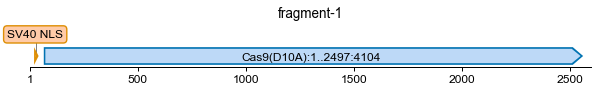

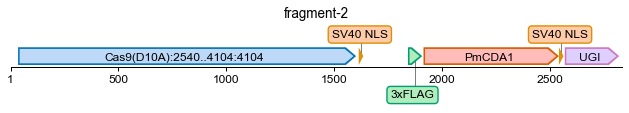

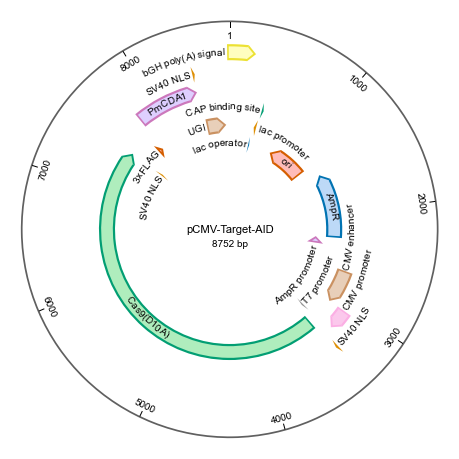

In [14]:
fig1=visualizemap(fragment1, title="fragment-1")
fig2=visualizemap(fragment2, title="fragment-2")
#fig3 = visualizemap(fragment3, linebreak=120, seq=True, title="fragment-3")
features = pCMV_Target_AID.searchfeature(key_attribute="feature_type", query="^(?!.*primer).*$")
fig4 = visualizemap(pCMV_Target_AID, feature_list=features, map_view="circular", tick_interval=1000, title="pCMV-Target-AID")
fig1.savefig("output/fig1.pdf", bbox_inches="tight")
fig2.savefig("output/fig2.pdf", bbox_inches="tight")
#fig3.savefig("output/fig3.pdf", bbox_inches="tight")
fig4.savefig("output/fig4.pdf", bbox_inches="tight")

----
#### Example code 28: Visualization of the flow chart for pCMV-Target-AID construction

In [15]:
alias_dict = {"pcDNA31_Target_AID": "pcDNA31-Target-AID",
              "pCMV_ABE": "pCMV-ABE",
              "pCMV_Target_AID": "pCMV-Target-AID",
              "extract1": "extract-1",
              "extract1": "extract-1",
              "extract1": "extract-1",
              "extract1": "extract-1",
              "extract2": "extract-2",
              "extract3": "extract-3",
              "fragment1": "fragment-1",
              "fragment2": "fragment-2",
              "fragment3": "fragment-3",
              "fragment1_mod": "fragment-1_mod",
              "fragment2_mod": "fragment-2_mod",
              "fragment3_mod": "fragment-3_mod"}
graph1 = visualizeflow(pCMV_Target_AID, sf=False, ip=True,  grouping=False, alias_dict=alias_dict)
graph2 = visualizeflow(pCMV_Target_AID, sf=True,  ip=True,  grouping=False, alias_dict=alias_dict)
graph3 = visualizeflow(pCMV_Target_AID, sf=True,  ip=True,  grouping=True, pd=True, alias_dict=alias_dict)
graph4 = visualizeflow(pCMV_Target_AID, sf=True,  ip=False, grouping=True, pd=False, alias_dict=alias_dict)

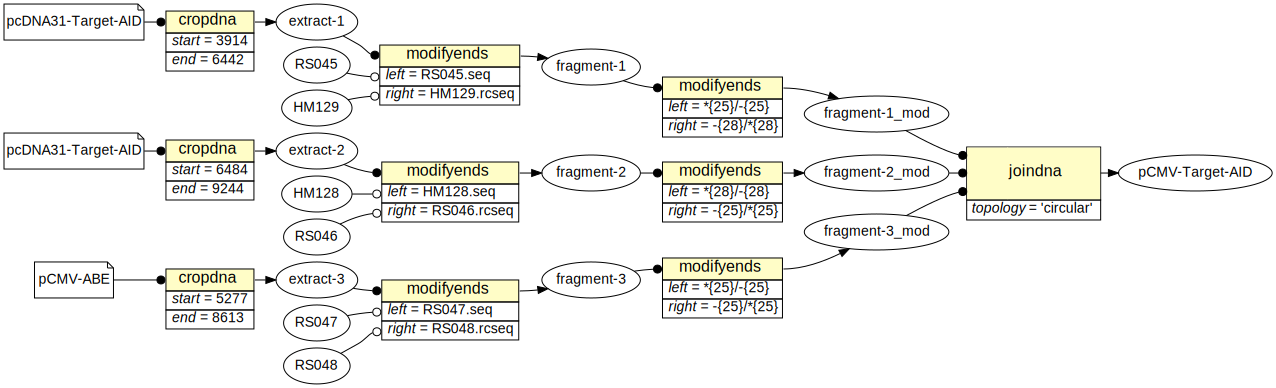

In [16]:
graph1

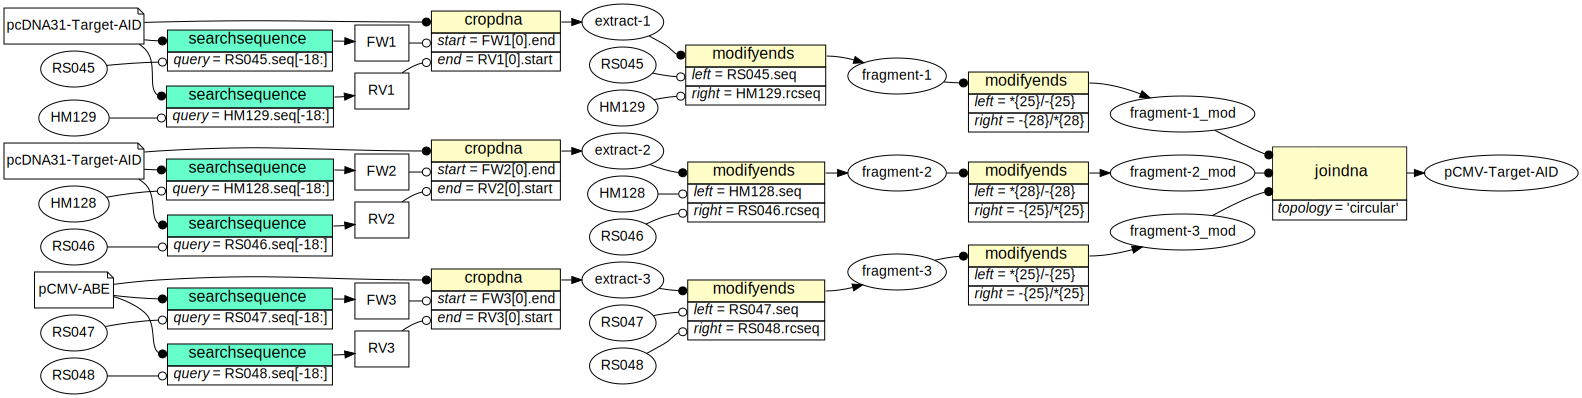

In [17]:
graph2

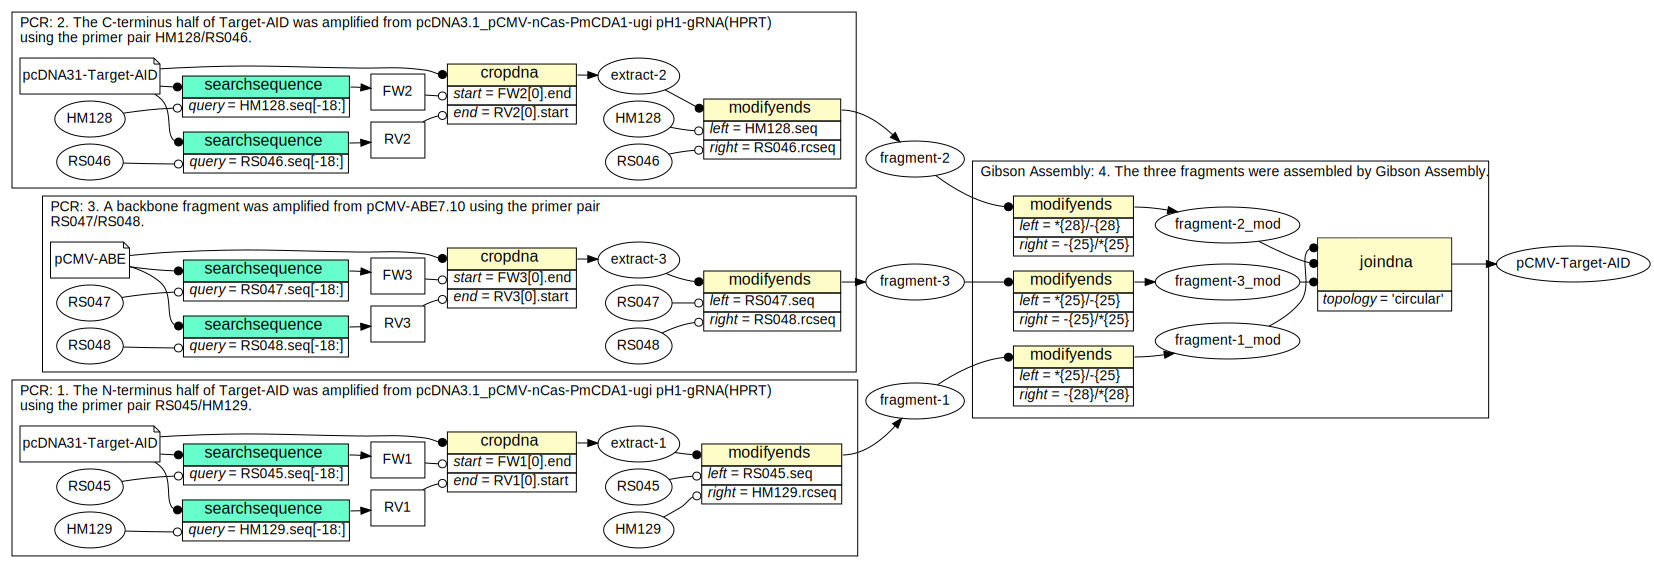

In [18]:
graph3

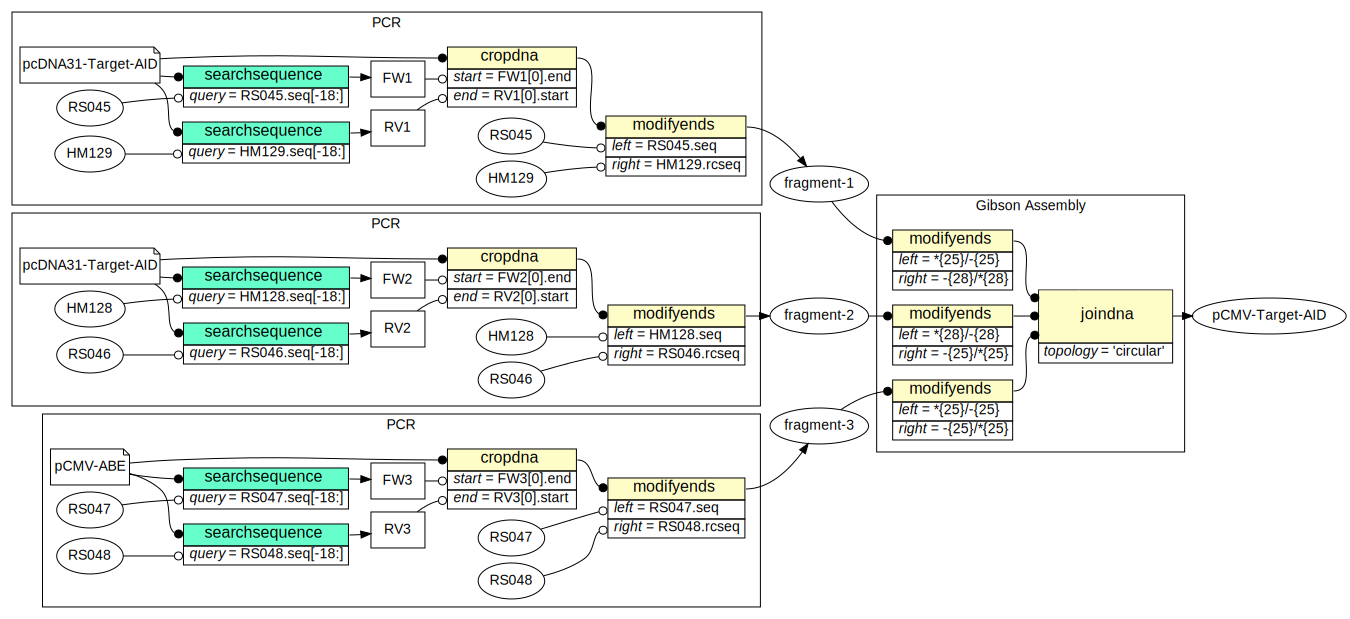

In [19]:
graph4

In [20]:
graph1.render("output/pCMV-Target-AID_flow1")
graph2.render("output/pCMV-Target-AID_flow2")
graph3.render("output/pCMV-Target-AID_flow3")
graph4.render("output/pCMV-Target-AID_flow4")

'output/pCMV-Target-AID_flow4.pdf'